In [61]:
# Run this first so it's ready by the time you need it
install.packages("readr")
install.packages("dplyr")
install.packages("ggformula")
library(readr)
library(dplyr)
library(ggformula)
fingers <- read_csv("https://raw.githubusercontent.com/smburns47/Psyc158/main/fingers.csv")


The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpoaTnjY/downloaded_packages

The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpoaTnjY/downloaded_packages

The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpoaTnjY/downloaded_packages


Rows: 157 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): Sex, RaceEthnic, Job, MathAnxious, Interest
dbl (11): FamilyMembers, SSLast, Year, GradePredict, Thumb, Index, Middle, R...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Chapter 16 - Estimating Populations


## 16.1 Evaluating model performance

We've spent a great deal of time so far learning about how to pull insights from sets of data - what the distribution of a variable looks like, how to predict new values based on other variables, etc. Ideally, these insights are useful not just for describing *this* dataset, but for many others you could possibly collect. We hope that our statistical results are good estimates of how things really are in the wider population. That way, we can make more general claims about broad categories that we're interested in, like human psychology. 

But we usually don't have access to the entire population. Instead, we have to collect a smaller sample and hope that it is representative. In a sample like the ```fingers``` dataset, which collected information from students in one statistics class, we might find that we can sort of predict someone's thumb length from how tall they are:

$$\hat{Thumb_i} = -3.33 + 0.96Height_i$$

By fitting this linear model, we predict that someone who is 60 inches tall will have a thumb length of 54.38mm, and for every additional inch of height they have their thumb length will be 0.96mm longer. Now these guesses will almost certainly be wrong - the RMSE of this model is 8.06, meaning on average our guess will be off by about 8mm. But basing our guesses off of someone's height makes our guesses at least better than just knowing the mean of thumb (15% better in fact, since the PRE score is 0.15). 

Those RMSE and PRE scores are both measures of model performance called effect sizes. We will return to those in a few chapters, but it's an important concept to start getting familiar with because it helps us decide what to *do* with our statistical model. Is it good enough? Am I confident in my predictions?

If we're okay with guesses that are on average 8mm away, we can stop there and move on with our day. If we want to make even better guesses, we can try to build a more complex model with additional predictors. Ultimately, how confident we are in our predictions is the deciding factor for how good our statistical models are. We build psychological theories about relationships between variables in order to find the predictors that will improve predictions about how people think, feel, and behave.  

With a large PRE score or low RMSE, our predictions are quite good. We are confident that the true values will not be too different... in this dataset, specifically. But one additional layer of uncertainty still at play is how good will this model be in *other* samples, or in the whole population?

## 16.2 Sampling distributions 

To answer this question, we must first remember that any one sample we collect won't look perfectly similar to the population. If it's not a representative sample, it'll be different in important ways. But even if it's a good representative sample, the law of large numbers tells us that randomness will cause some variations, particularly if the sample is much smaller than the population (which psychology samples ALWAYS are, since our population is the billions of humans who have lived or will ever live). Thus, the models we build using that sample - which are intended to explain variation - can *themselves* vary sample to sample. The sample statistics won't be the same as the population parameters. 

For example, let's say we know the population mean of height for all Claremont College students is 66 inches, and the standard deviation is 3.5 inches. Then, a researcher comes along and picks 5 different samples of 50 students each, creating the following sample statistics:

| Sample number | Height mean | Height SD  | 
| :-----------: | :---------: | :--------: |
| 1             | 65.65       | 3.13       |
| 2             | 67.04       | 3.73       |
| 3             | 65.94       | 3.70       |
| 4             | 64.37       | 4.04       |
| 5             | 66.04       | 3.26       |

The sample mean and standard deviation are similar but not exactly equal to the population values. When statistics vary across samples, this is called **sampling error**. There's *variation* in the many sample estimates around the true population parameter. Where else have we seen variation around a central tendency before?

Now let’s take a large number of samples (say, 5,000) of 50 individuals and compute the mean for each of them. The result is a set of 5,000 sample statistics - kinda sounds like a dataset, doesn't it? 

We've spent a long time working with distributions of data around the mean of those data. We measured that central tendency because it is the best single number to use to characterize the value of data in that distribution. 

We can extend that logic to understanding how the estimates we get across several samples relates to the true population parameter. We can make a distribution of sample *statistics*, rather than only raw observations. In this case, each statistic (e.g. the mean of each separate sample) is a unique entry in the distribution. This is a **sampling distribution** - a distribution of sampling statistics. Specifically, this is a sampling distribution of the mean (since that's the statistic we're calculating).

<img src="images/ch16-sampdist.png"  width="750">

The gray histogram above shows each raw observation for height in the dataset, and the blue histogram shows the mean values for each 50-person sample. The sample means vary somewhat, but something to notice is that overall they are centered around the population mean. The average of the 5,000 sample means (168.3463) is very close to the true population mean (168.3497).

Technically you can make a sampling distribution for any statistic you can think of - the mean, a model coefficient b<sub>1</sub>, an effect size like PRE, etc. It would be a distribution of those values calculated on different samples.

This is how we go from being confident about predictions in our samples, to being confident about how well those predictions *generalize* to other samples and the population. We build a model within a sample, and then ask ourselves: given an assumption about the population parameter, what other sorts of estimates from other sorts of samples would we be likely to find? Is our estimate in that sampling distribution? And across all of those hypothetical samples, would our model generally be good? 

The process of asking these questions is called **hypothesis testing**, and we will dedicate the rest of the course to doing it. Hypothesis testing is when you make a hypothesis about what the population truly looks like, and then decide how likely that image of the world matches up with the dataset you've collected. It is an exercise in hypotheticals, reasoning about the range of conclusions you could make based on a variety of data samples you could collect.  

To prepare for asking these questions, let's learn more about the nature of sampling distributions and how they relate to the population parameter. 

## 16.3 The importance of sample size

You probably have some intuition that statistical inferences are better the bigger your sample size. In the popular conscious, it seems like "sample size" ranks right under "correlation is not causation" in terms of critiques about psychology research. Sample size is indeed an important concern, and in this section you'll learn why. 

In the example above, each of our samples was 50 people. We can actually simulate this with our ```fingers``` dataset, by pretending that the data we have represents the whole population and then sampling from that with replacement. This technique is called **bootstrapping**, and helps us make inferences about sampling distributions even when we don't know the population parameter. Essentially, we treat our data distribution as a probability distribution and draw many new samples from that. 

Remember when we learned to use the ```sample()``` function to collect samples from a probability distribution. First we defined a sample space, e.g the six side of a die ```c(1,2,3,4,5,6)```. Then we said how many items we want to draw from that sample space, and whether or not we want to draw with replacement (i.e. allow for us to draw the same item multiple times). 

In bootstrapping, we do the same thing but with a data distribution as our sample space: 

In [63]:
#drawing a sample of 50 heights from the fingers dataset
#if we leave out the probs argument, probability of each item will correspond to 
#its frequency in the dataset
bootstrap_sample <- sample(x = fingers$Height, size = 50, replace = TRUE)
bootstrap_sample

[1] 70.0 64.0 62.5 62.5 64.0 73.0 75.0 70.0 61.0 64.0 68.5 72.0 66.5 68.1 70.0
[16] 62.0 63.5 64.0 62.5 62.0 64.0 65.0 65.0 64.8 73.5 66.0 65.5 72.0 70.0 74.0
[31] 62.0 62.2 69.5 64.0 68.5 64.0 66.0 73.0 65.0 61.0 68.1 68.1 59.0 65.5 64.0
[46] 67.0 64.0 62.0 68.0 59.1

If we calculate the mean of this sample, we come up with one statistical estimate:

In [64]:
mean(bootstrap_sample)

[1] 66.098

Compare that to the true "population" mean (mean of the entire ```Height``` variable):

In [65]:
mean(fingers$Height)

[1] 65.94682

Our sample estimate isn't exactly the same, but it's pretty close. 

Now let's scale this up and simulate many samples of heights - say, 1,000 samples. Complete the code below to make this simulation run without errors.

In [67]:
#creating an empty vector of 1000 spots
bootstrap_means50 <- vector(length=1000)

#generate 1000 unique samples, saving each mean
for (i in 1:1000) {
    #draw a sample of 50 heights from fingers$Height, replace = TRUE
    bootstrap_sample <- #YOUR CODE HERE
    m <- mean(bootstrap_sample)
    bootstrap_means50[i] <- m
}

head(bootstrap_means50)

[1] 65.324 64.910 66.843 67.368 66.516 65.872

If we turn this set of means into a dataframe, we can plot a histogram and see how these means vary. We'll also add a vertical line at the population mean, to see how these sample means compare to it. 

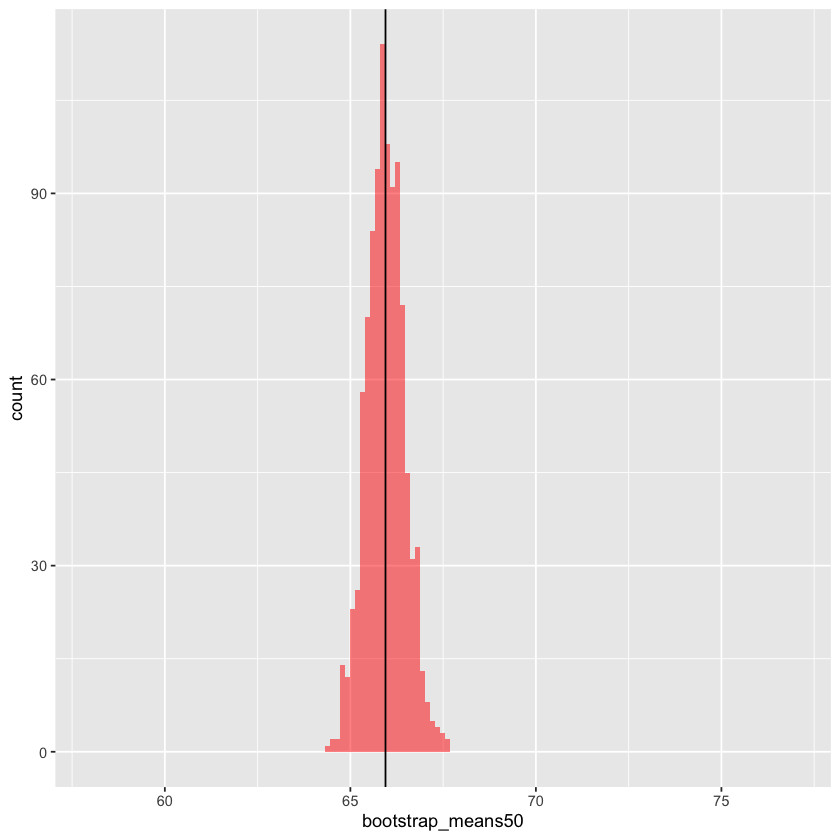

In [68]:
bootstrap_df <- data.frame(bootstrap_means50)
gf_histogram(~ bootstrap_means50, data=bootstrap_df, fill = "red") %>%
gf_refine(coord_cartesian(x=c(58,77))) %>%
gf_vline(., xintercept = mean(fingers$Height))

Compare the spread of this sampling distribution to the distribution of raw values in ```fingers$Height```:

In [ ]:
gf_histogram(~ Height, data=fingers) %>% gf_refine(coord_cartesian(x=c(58,77))) %>%
    gf_vline(., xintercept = mean(fingers$Height))

There's variability among the sample means such that nearly all are different from the "population" mean, but any one sample mean gets pretty close to the population parameter. Further, if we take the mean of *means*: 

In [ ]:
mean(bootstrap_means50)
mean(fingers$Height)

It is nearly identical to the population parameter. 

Now what if we collected just as many samples, but small ones? Edit this code to do the same sampling procedure as above, but with ```size = 5``` for each sample.

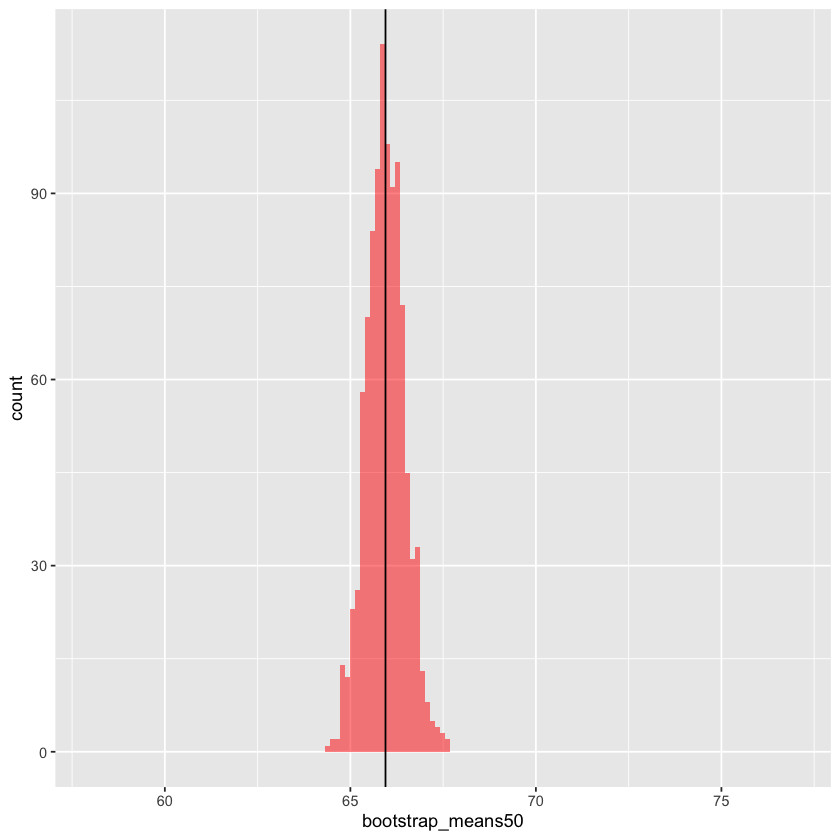

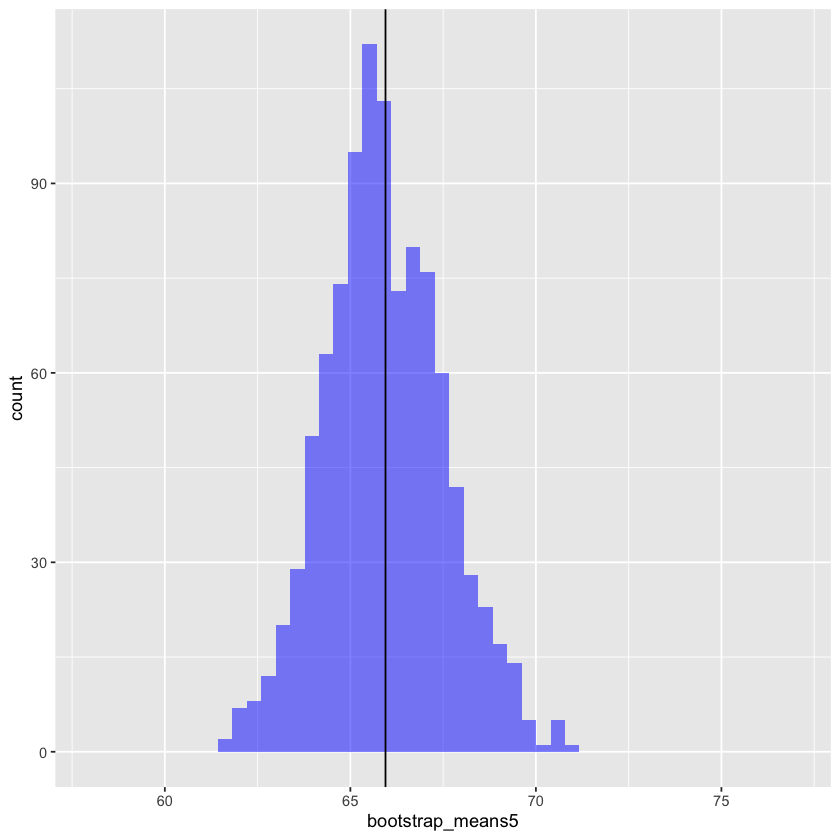

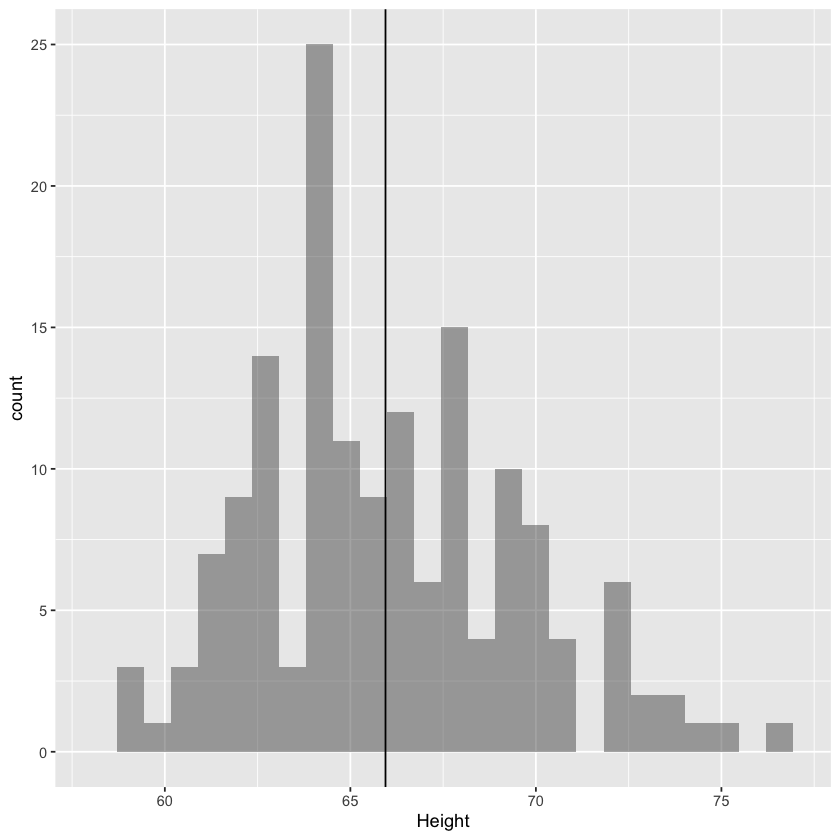

In [69]:
#creating an empty vector of 1000 spots
bootstrap_means5 <- vector(length=1000)

#generate 1000 unique samples, saving each mean
for (i in 1:1000) {
    #draw a sample of 5 heights from fingers$Height, replace = TRUE
    bootstrap_sample <- #YOUR CODE HERE
    m <- mean(bootstrap_sample)
    bootstrap_means5[i] <- m
}

bootstrap_df$bootstrap_means5 <- bootstrap_means5

#plotting distribution of n=50 samples
gf_histogram(~ bootstrap_means50, data=bootstrap_df, fill = "red") %>%
gf_refine(coord_cartesian(x=c(58,77))) %>% gf_vline(., xintercept = mean(fingers$Height))

#plotting distribution of n=5 samples
gf_histogram(~ bootstrap_means5, data=bootstrap_df, fill = "blue") %>%
gf_refine(coord_cartesian(x=c(58,77))) %>% gf_vline(., xintercept = mean(fingers$Height))

#distribution of population data
gf_histogram(~ Height, data=fingers) %>% gf_refine(coord_cartesian(x=c(58,77))) %>% 
gf_vline(., xintercept = mean(fingers$Height))

This sampling distribution is wider than the first - on average, each sample mean is farther away from the true population parameter. However, the mean of *means* is still quite close:

In [71]:
mean(bootstrap_means5)
mean(fingers$Height)

[1] 65.92792

[1] 65.94682

[1] 1.585936

Finally, let's take this exercise to the extreme with a sample size that is as small as possible. Modify the code to draw 1000 samples of only 1 data point each. 

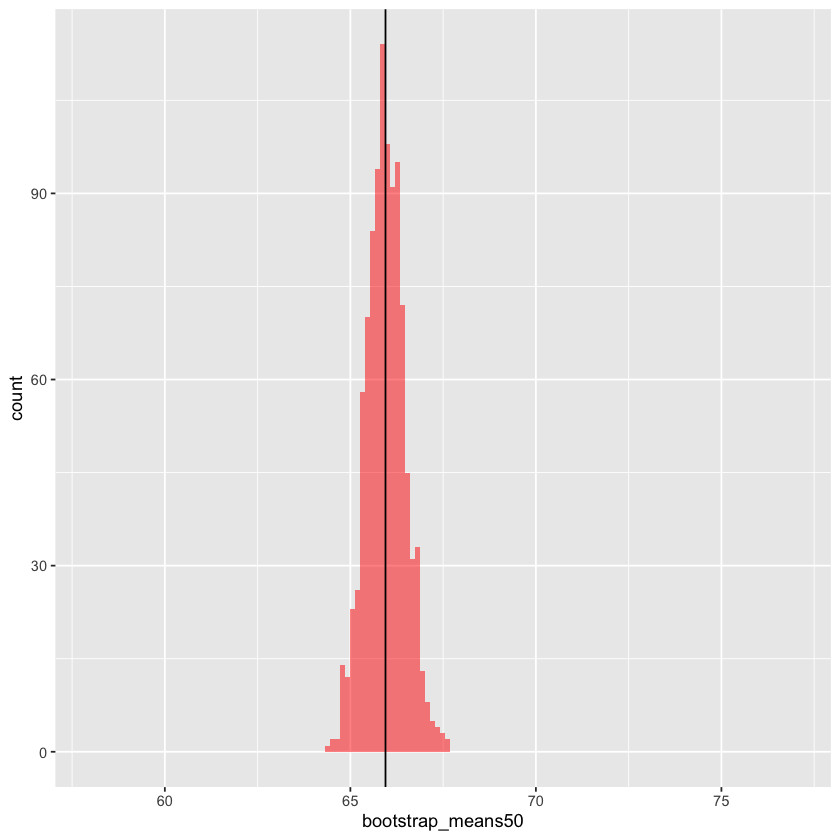

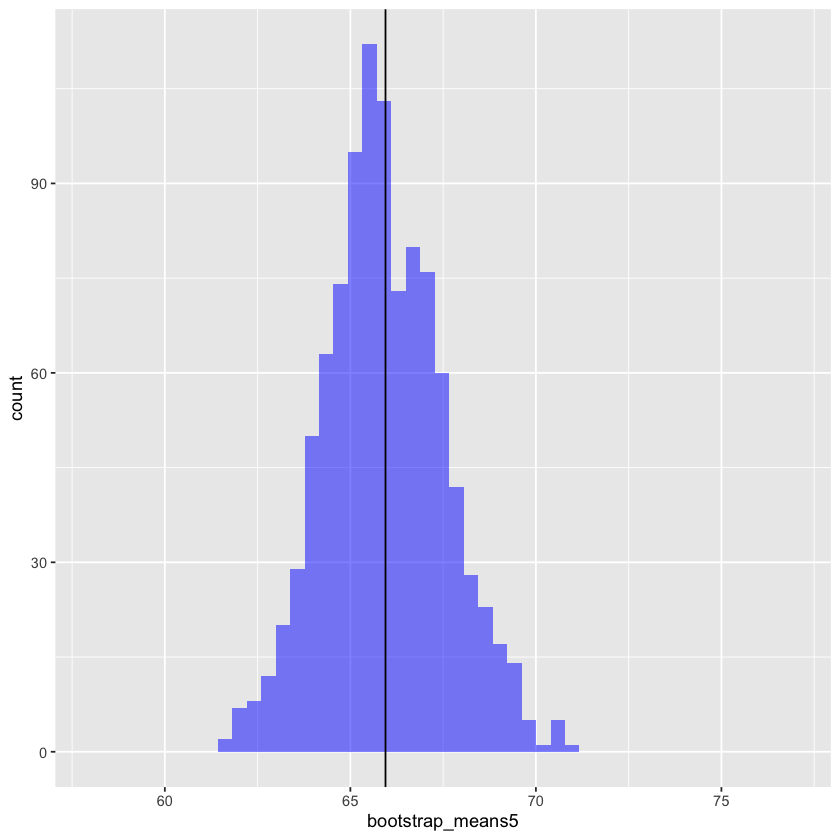

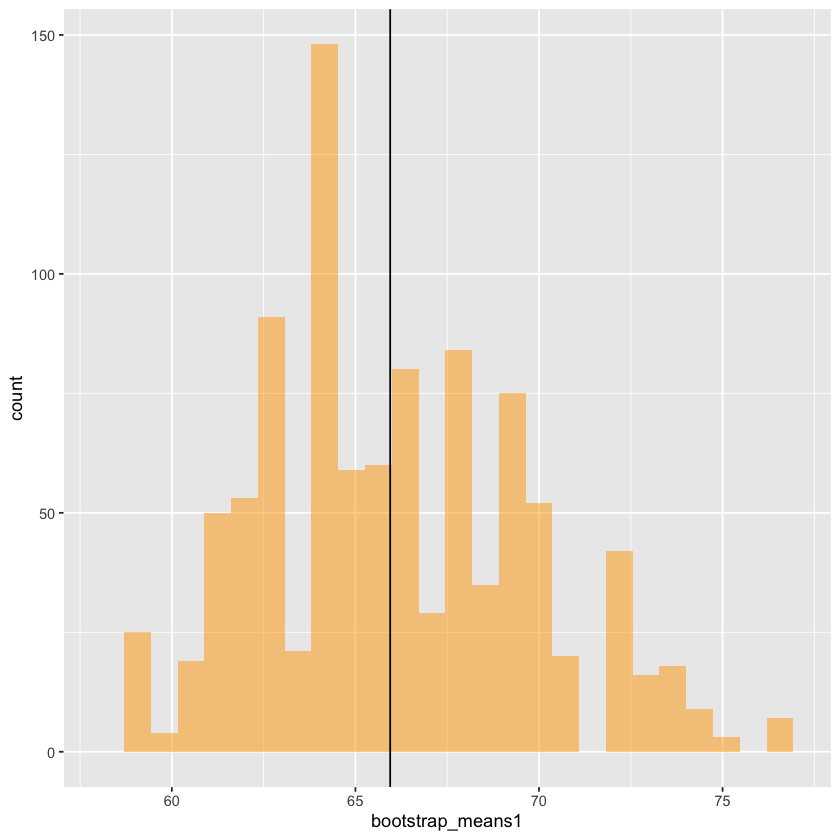

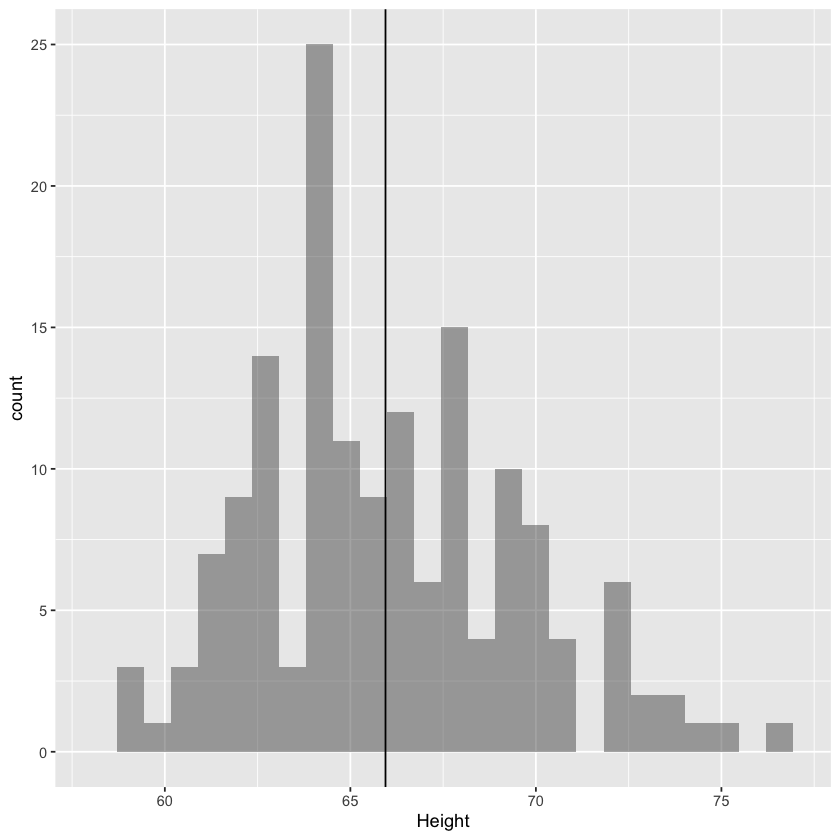

In [70]:
#creating an empty vector of 1000 spots
bootstrap_means1 <- vector(length=1000)

#generate 1000 unique samples, saving each mean
for (i in 1:1000) {
    #draw a sample of 1 height value from fingers$Height, replace = TRUE
    bootstrap_sample <- #YOUR CODE HERE
    m <- mean(bootstrap_sample)
    bootstrap_means1[i] <- m
}

bootstrap_df$bootstrap_means1 <- bootstrap_means1

#plotting distribution of n=50 samples
gf_histogram(~ bootstrap_means50, data=bootstrap_df, fill = "red") %>%
gf_refine(coord_cartesian(x=c(58,77))) %>% gf_vline(., xintercept = mean(fingers$Height))

#plotting distribution of n=5 samples
gf_histogram(~ bootstrap_means5, data=bootstrap_df, fill = "blue") %>%
gf_refine(coord_cartesian(x=c(58,77))) %>% gf_vline(., xintercept = mean(fingers$Height))

#plotting distribution of n=1 samples
gf_histogram(~ bootstrap_means1, data=bootstrap_df, fill = "orange") %>%
gf_refine(coord_cartesian(x=c(58,77))) %>% gf_vline(., xintercept = mean(fingers$Height))

#distribution of population data
gf_histogram(~ Height, data=fingers) %>% gf_refine(coord_cartesian(x=c(58,77))) %>% 
gf_vline(., xintercept = mean(fingers$Height))

This reveals a sampling distribution that approaches the same shape as the population distribution, since each "sample" is just one data point from the population. And yet, when comparing the mean of this wide sampling distribution to the population mean:

In [ ]:
mean(bootstrap_means1)
mean(fingers$Height)

Based on this demonstration, we can see that if you only have a few observations in a sample, any one sample mean is unlikely to be inaccurate: if you replicate a small experiment and recalculate the mean you’ll get a very different answer. The sampling distribution is quite wide. This is why statistical answers from studies with a small sample can be misleading.

In contrast, if you run a large experiment and replicate it with another large sample, you’ll probably get nearly the same answer you got last time. The sampling distribution will be very narrow. If we took this to the extreme other side and drew samples that were infinitely large, we'd eventually create a sampling distribution that was just a single line at the population mean. This would be because we'd be taking samples over and over that *are* the population.  

Since we don't have this full population though, only smaller samples, we can quantify the variation in the sampling distribution by calculating the standard deviation of the sampling distribution. This is referred to as the **standard error.** The standard error of a statistic is often denoted SE. Think of the standard error as how far a sample estimate typically is from the true population parameter.

Sample size matters for collecting data samples because as the sample size gets larger, the standard error of the sampling distribution gets smaller. Our sample estimates are on average closer to the true population parameter. 

## 16.4 The Central Limit Theorem

Despite how poorly a single small sample can do on telling you about a population parameter, it's important to remember that several samples together, even if very small, will stack up into a distribution that is centered on the true population parameter. That's why, no matter how small our samples were in the previous demonstration, the mean of means was always very close to the population mean. 

On the basis of what we've seen so far, it seems like we have evidence for the following claims about the
sampling distribution of the mean:

- The mean of the sampling distribution is the same as the mean of the population
- The standard deviation of the sampling distribution (i.e., the standard error) gets smaller as the sample size increases

As it happens, not only are these statements true, there is a very famous theorem in statistics that proves them, known as the **Central Limit Theorem.** We won't spend time here on the [mathematical proof](https://en.wikipedia.org/wiki/Central_limit_theorem#Proof_of_classical_CLT) that establishes this - our simulations above are demonstration enough for our purposes. But from this proof we can get specific equations for calculating the standard error. 

When the mean is our sample estimate of interest, the Central Limit Theorem tells us, for a population with mean µ and standard deviation σ, that the sampling distribution of the mean also has mean µ, and the standard error of the mean (SEM) is

$$SEM = \frac{σ}{\sqrt{N}}$$

where N is the size of samples in the sampling distribution. This says that, when sampling from a population with standard deviation σ, the means of all samples of size N will vary around the true mean by the SEM amount. Further, because we divide the population standard devation σ by the square root of the sample size N, the SEM gets smaller as the sample size increases. 

This result is useful for all sorts of things. It tells us why large experiments are more reliable than small ones, and because it gives us an explicit formula for the standard error it tells us how much *more* reliable a large experiment is than a small one. 

## 16.5 Estimating population parameters

In the examples in the previous sections, we knew the population parameters ahead of time. This is helpful for learning about statistics, but of course the most interesting things to do research on are the things we don't already know about; that which we don't know the population distribution for. So if we want to calculate standard error, how far away our estimate of a mean is likely to be from the population mean, with an equation like σ/sqrt(N), how do we do that when we don't know µ or σ?

For instance, suppose you wanted to measure the IQ of Claremont College students. IQ in the general population is known - it has a mean of 100 and a standard deviation of 15. But maybe Claremont College students are a different sort of population, with a different mean and SD. So to find out the IQ of the kind of students who come to the 5Cs, we’re going to have to estimate the population parameters from a sample of data. So how do we do this?

### Estimating the population mean
Suppose we camp outside Frary and ask 100 students to take an IQ test for us. The average IQ score among these people turns out to be X¯=102.5. So what is the true mean IQ for the entire population of Claremont College students? Obviously, we don’t know the answer to that question. It could be 97.2, or 108. We only have one sample, so we cannot give a definitive answer. Nevertheless, right now our “best guess” is 102.5. That’s the essence of statistical
estimation: giving a best guess.

In this example, estimating the unknown poulation parameter for the mean is straightforward. We calculate the sample mean, and we use that as an estimate of the population mean. We calculate X¯, and treat that number as our best guess about the value of µ. Much like we gave hats to symbols in the modeling chapters to designate the difference between predicted values and true values, we can do so here to designate what our predictions are of the population parameter, based on a sample of data.

| Symbol | What is it?                       | 
| :----: | :-------------------------------: | 
| X¯     | Sample mean                       |
| µ      | True population mean              |
| µˆ     | Prediction of the population mean | 

When we have one data sample, X¯ is thus used as µˆ but we keep in mind that this is likely to vary from the true µ by the standard error. 

### Estimating the population standard deviation
So far, estimation seems pretty simple - just take a sample estimate and treat it as the population parameter. So you might be wondering why we forced you to read through all that stuff about sampling theory before getting here. In the case of the mean, our estimate of the population parameter (i.e. ˆµ) turned out to identical to the corresponding sample statistic (i.e. X¯). However, that’s not always true. To see this, let’s think about how to construct an estimate of the population standard deviation, which we’ll denote ˆσ. What shall we use as our estimate in this case? 

| Symbol | What is it?                   |
| :----: | :---------------------------: | 
| s      | Sample sd                     |
| σ      | True population sd            |
| σˆ     | Estimate of the population sd |

Your first thought might be that we could do the same thing we did when estimating the mean, and just use the sample
statistic as our estimate. That’s almost the right thing to do, but not quite. Here’s why. Suppose we have a sample that contains a single IQ observation of 98. This is a perfectly legitimate sample, even if it does have a sample size of N=1. It has a sample mean of 98, and because every observation in this sample is equal to the sample mean (obviously!) it has a sample standard deviation of 0: the sample contains a single observation and therefore there is no variation observed within the sample. But as an estimate of the population standard deviation, this may feel completely wrong. Knowing that data implies variability, the only reason that we don’t see any variability in the sample is that the sample is too small to display any variation, not because everyone has an IQ of 98. So, if you have a sample size of N=1, it feels like the right answer about the population standard deviation is just to say “no idea at all”. 

Suppose we now make a second observation. The dataset now has N=2 observations, and the complete sample now contains the observations 98 and 100. This time around, our sample is just large enough for us to be able to observe some variability: two observations is the bare minimum number needed for any variability to be observed. For our new dataset, the sample mean is X¯=99, and the sample standard deviation is s=1. What intuitions do we have about the population? Again, as far as the population mean goes, the best guess we can possibly make is the sample mean: if forced to guess, we’d probably guess that the population mean IQ is 99. What about the standard deviation? The sample standard deviation is only based on two observations, so you may feel that we haven’t given the population “enough of a chance” to reveal its true variability to us. It’s not just that we suspect that the estimate is wrong: after all, with only two observations we expect it to be wrong to some degree. The worry is that the error is *systematic*, such that *every* sample of 2 observations would be wrong in the same direction. Specifically, we suspect that the sample standard deviation is likely to be smaller than the population standard deviation.

We can use R to simulate the results of many samples to demonstrate this. Given the true population mean of IQ is 100 and the standard deviation is 15, we can use the ```rnorm()``` function to generate the results of an experiment in which we measure N=2 IQ scores, and calculate the sample standard deviation. If we do this over and over again, and plot a histogram of these sample standard deviations, we get the sampling distribution of the standard deviation (see figure below). 

<img src="images/ch16-sdestimate.png"  width="350">

Even though the true population standard deviation is 15, the average of the sample standard deviations is only 8.5. Notice that this is a very different result to what we found when we plotted the sampling distribution of the mean of ```Height``` in ```fingers```. In that sampling distribution, the population mean was 65.95, and the average of the sample means was always close to that.

Now let’s extend the simulation. Instead of restricting ourselves to the situation where we have a
sample size of N=2, let’s repeat the exercise again for sample sizes from 1 to 10. If we plot the average sample mean and average sample standard deviation as a function of sample size, you get the results shown in this next figure. 

<img src="images/ch16-estimatesim.png"  width="650">

On the left hand side (panel A) is the average sample mean for each sample size, and on the right hand side (panel B) is the average standard deviation for each sample size. The two plots are quite different: no matter the sample size, the average sample mean from a sample distribution of the mean is equal to the population mean. It is an **unbiased estimator,** which is the reason why your best estimate for the population mean is the sample mean. The plot on the right shows that the average sample standard deviation from a sample distribution of the standard deviation is smaller than the population standard deviation σ for small sample sizes. It is a **biased estimator.** In other words, if we want to make a “best guess” σˆ about the value of the population standard deviation σ, we should make sure our guess is a little bit larger than the sample standard deviation s.

The fix to this systematic bias turns out to be very simple. We rely on degrees of freedom! If you recall from Chapter 5, the sample variance is defined to be the average of the squared deviations from the sample mean, with one change. That is:

$$s^2 = \frac{1}{N-1}\sum_{i=1}^{N}|X_i-\bar{X}|^2$$

where the sum of the squared deviations are divided by N-1 instead of N, like in a normal average. As it turns out, this change is all we need to do to make variance an unbiased estimator. This is also true in the equation for standard deviation: 

$$s = \sqrt{\frac{1}{N-1}\sum_{i=1}^{N}|X_i-\bar{X}|^2}$$

This is why we use degrees of freedom when making model estimates. Dividing by a slightly smaller number helps us fix how much estimates of population standard error undershoot the actual standard error. 

It's also why it's important to keep the idea of a *sample statistic*, an *estimate of the population parameter*, and *the true population parameter* separate in your head. For the mean, the sample statistic and parameter estimate are calculated the same way, but for standard deviation they are calculated differently. Notice also that, because the R functions ```var()``` and ```sd()``` use N-1, they are technically calculating a population parameter estimate and not a sample statistic. This is because, in almost every real life application, what we actually care about is the estimate of the population parameter (i.e., extrapolating from the current sample to saying something about the larger world), and so people usually report ˆσ rather than the sum of squares divided by N.

When we want to know the standard error of the mean, we need to use the population parameter σ. But we don't have it for sure, so our next best option is to use an *estimate* of the population standard deviation:

$$SEM = \frac{\hat{σ}}{\sqrt{N}}$$

## 16.6 Sampling distributions of model outputs

The mean and standard deviation aren't the only sampling distributions we use. All sample statistics have a counterpart parameter that describes the true population, and thus a distribution of estimates can be built from many samples. 

Another sampling distribution that will be relevant to us is the distribution of coefficients from a statistical model. Let's fit a simple linear regression predicting thumb length from height in the ```fingers``` dataset and look at the estimate of b<sub>1</sub>:

In [ ]:
#fit a linear model of Thumb predicted by Height, in the fingers dataset
height_model <- lm(#YOUR CODE HERE)
height_model
gf_point(Thumb ~ Height, data=fingers) %>% gf_lm()

The estimate for b<sub>1</sub> is 0.96, indicating that a regression line best fits *these data* with minimal error if it has a slope of 0.96. For every one-inch increase in someone's height, we'd predict that their thumb length would be 0.96mm longer. But now let's treat ```fingers$Height``` as a population again, and bootstrap some separate samples in which we fit a model for each. We'll use the function ```sample_n()``` from the ```dplyr``` package in order to sample entire rows of a data frame. 

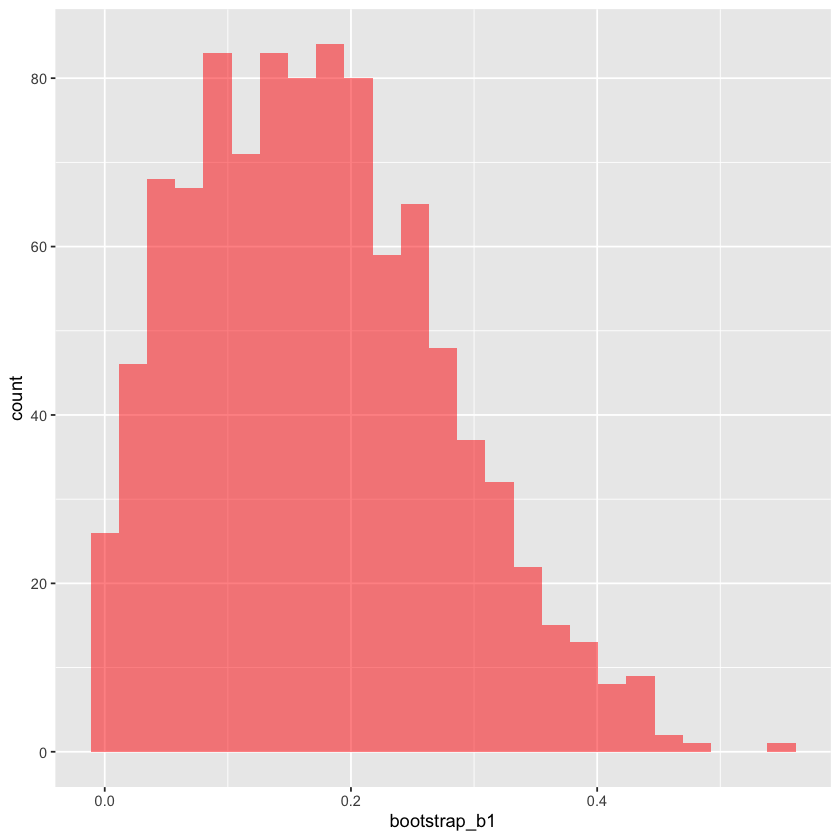

In [72]:
#creating an empty vector of 1000 spots
bootstrap_b1 <- vector(length=1000)

#generate 1000 unique samples, saving each mean
for (i in 1:1000) {
    #draw a sample of 50 height value from fingers$Height, replace = TRUE
    bootstrap_sample <- sample_n(fingers, size=50, replace=TRUE)
    bootstrap_model <- lm(Thumb ~ Height, data=bootstrap_sample)
        bootstrap_b1[i] <- bootstrap_model$coefficients[[2]]
}

bootstrap_df <- data.frame(bootstrap_b1)

#plotting distribution of n=50 samples
gf_histogram(~ bootstrap_b1, data=bootstrap_df, fill = "red")

From this, we can clearly see that models built on different data will come up with different coefficient estimates. Some will say that ```Thumb``` and ```Height``` will relate to each other in much the same way as they do in the "population": 

In [ ]:
set.seed(10)
bootstrap_sample <- sample_n(fingers, size=50, replace=TRUE)
lm(Thumb ~ Height, data=bootstrap_sample)
gf_point(Thumb ~ Height, data=bootstrap_sample) %>% gf_lm()

But others will over-estimate the model slope:

In [ ]:
set.seed(138)
bootstrap_sample <- sample_n(fingers, size=50, replace=TRUE)
lm(Thumb ~ Height, data=bootstrap_sample)
gf_point(Thumb ~ Height, data=bootstrap_sample) %>% gf_lm()

While still others will even flip the direction of the effect, such that we predict someone's thumb would be *shorter* for each one-inch increase in height: 

In [ ]:
set.seed(179)
bootstrap_sample <- sample_n(fingers, size=50, replace=TRUE)
lm(Thumb ~ Height, data=bootstrap_sample)
gf_point(Thumb ~ Height, data=bootstrap_sample) %>% gf_lm()

This tells us that our estimate of the coefficient may not be the true population coefficient, and is likely to vary around the population parameter by the amount of the standard error. The equation for the standard error of a regression coefficient is a more complicated equation than those for the standard error of the mean so we won't make you learn it, but it is again a function of sample size. You can actually find it directly in R with a new function that works on model objects, ```summary()```. 

In [ ]:
summary(height_model)

This gives you a lot more information about a model than just its coefficients. For our purposes right now, look at the table under the heading "Coefficients:". Each row is for each parameter estimated by our model - the intercept (b<sub>0</sub>) and the effect of ```Height``` (b<sub>1</sub>). The first column, "Estimate" shows you the same coefficient estimate as you would get from simply typing the model object name into the console window. 

Some new information is in the next column over, called "Std. Error". This stands for the standard error of the estimate, or how much this estimate is likely to vary from the population coefficient.

## 16.7 Confidence intervals

All of this is to say, our sample estimates are only that - estimates. They are likely to be more similar to the true population parameter the larger our samples are, but there's still variation among estimates from different data samples. So how well can we ever trust one particular sample estimate? How certain can we be that our estimate of the mean, model coefficient, etc. is close to the population estimate? It would be nice to say that we are reasonably confident that the true parameter is in some window around this estimate. 

In fact, there is a way we can say exactly that. The name for this concept is a **confidence interval** of the estimate. This is an interval of values around our estimate that expresses a degree of confidence that the true parameter is somewhere in that interval. 

Our understanding of sampling distributions now will help us construct a confidence interval. Let's start out with an estimate of the b<sub>1</sub> coefficient in a general linear model. We’ve just finished running an analysis and estimated a b<sub>1</sub> value of 6.05. Suppose we lucked out on that estimate, and the true population coefficient &beta;<sub>1</sub> is also 6.05. Thus, of all the samples we *could have* collected, there is a range of possible b<sub>1</sub> estimates we *could have* come up with. You can see this possible range of b<sub>1</sub> estimates in the sampling distribution below. In this image, values within the dotted black lines are more likely to occur given &beta;<sub>1</sub> = 6.05, and values outside the dotted lines are unlikely to occur. 

<img src="images/ch16-beta605.png" width="450">

Now instead imagine that the true population coefficient &beta;<sub>1</sub> is actually 0. If we visualize the sampling distribution that would occur based on this parameter, we get something like the image below. 

<img src="images/ch16-beta0.png" width="450">

The width of these sampling distributions is determined by the standard error of the estimate, which is related to sample size. In this sampling distribution, even though the true &beta;<sub>1</sub> is 0, it is still somewhat likely to get an estimate b<sub>1</sub> of 6.05.

From our musings so far, we can see that &beta;<sub>1</sub> could be 0 or it could be 6.05. Both of those population parameters can reasonably produce a sample where the b<sub>1</sub> estimate is 6.05. And these are just two of the many possible parameters that could have produced the sample estimate of 6.05. 

But using this strategy, we can also rule *out* some possibilities. There are values of &beta;<sub>1</sub> that are not likely to produce the sample estimate. Imagine a parameter with a &beta;<sub>1</sub> a lot larger than 6.05, such as 15. In this case, the sampling distribution produced by that population may look like so: 

<img src="images/ch16-beta15.png" width="550">

Such a population parameter could produce a variety of samples. But notice that a sample estimate of 6.05 is no longer within the distribution. It's outside the bounds of what we would expect, if &beta;<sub>1</sub> was actually 15. We could say, therefore, that a parameter with &beta;<sub>1</sub> = 15 is unlikely to have generated the sample b<sub>1</sub> = 6.05 because 6.05 is much lower than most of the b<sub>1</sub>s generated by &beta;<sub>1</sub> = 15.

By the same logic, if the true &beta;<sub>1</sub> = -2, we can see that it is unlikely that the b<sub>1</sub> of 6.05 came from a population with a &beta;<sub>1</sub> as low as -2. By generating sampling distributions for different &beta;<sub>1</sub>s, we can begin to see the range of possible &beta;<sub>1</sub>s that could have generated our sample b<sub>1</sub>.

<img src="images/ch16-beta2.png" width="600">

Ultimately, we want to find the range of &beta;<sub>1</sub>s that are all likely to produce the sample b<sub>1</sub>. This is the basic idea behind confidence intervals. Confidence intervals allow us to quantify the variation in a sample estimate and make statements such as, “We are 95% confident that the true parameter falls between these two values.” In order to make such a statement, we need a way to find a lower bound and an upper bound of &beta;<sub>1</sub>s that are likely to produce our b<sub>1</sub>.

We know from our discussion of standard deviation in Chapter 5 that 95% of a distribution will fall within 2 standard deviations of the distribution's mean (it's more like 1.96 standard deviations, actually). Applied to a sampling distribution, we can find the range of b<sub>1</sub>'s that 95% of the time will be generated by the sampling distribution of &beta;<sub>1</sub>. To put that in mathematical terms:

$$\beta_1 - (1.96 * SE) \leq b_1 \leq \beta_1 + (1.96 * SE)$$

where the SE is the standard error (aka the standard deviation of the sampling distribution). This equation tells us that, for 100 sample estimates b<sub>1</sub>, 95 of them are expected to fall between &beta;<sub>1</sub> - (1.96 * SE) and &beta;<sub>1</sub> + (1.96 * SE). 

However, that’s not answering the question that we’re actually interested in. The equation above tells us what we should expect about b<sub>1</sub> estimates, given that we know what the population parameter is. What we want is to have this work the other way around: we want to know what we should believe about the population parameter, given that we have observed a particular sample estimate. 

So to answer this question instead, we first find the lower bound as the &beta;<sub>1</sub> where b<sub>1</sub> is at most 1.96 SE's above the population parameter.

$$b_1 = \beta_{low} + 1.96*SE$$

Rearranging this algebraically to solve for &beta;<sub>low</sub>, we'd find:

$$\beta_{low} = b_1 - 1.96*SE$$

This means that the lowest &beta;<sub>1</sub> that is still likely to produce our specific estimate of b<sub>1</sub> is b<sub>1</sub> - 1.96\*SE. 

The upper bound is the &beta;<sub>1</sub> where b<sub>1</sub> is at most 1.96 SE's *below* the population parameter.

$$b_1 = \beta_{high} - 1.96*SE$$

And rearranged: 

$$\beta_{high} = b_1 + 1.96*SE$$

This means that the highest &beta;<sub>1</sub> that is still likely to produce our specific estimate of b<sub>1</sub> is b<sub>1</sub> + 1.96\*SE. 

Thus, if the true &beta;<sub>1</sub> is anything in this range, b<sub>1</sub> is a likely outcome. When reporting these intervals in text, we usually include the coefficient estimate followed by the 95% CI in brackets. I.e., "the estimate of the effect of Height is b<sub>1</sub> = 0.9619, 95% CI [0.603, 1.321]".

<img src="images/ch16-cirange.png" width="750">

Since the specific values in a confidence interval are calculated based on an estimate b<sub>1</sub>, you should think of the specific range of a confidence interval as being an estimate too. If we were to collect 100 samples, we would get 100 unique versions of this interval, since we'd have 100 unique values of b<sub>1</sub>. But 95 out of 100 of these confidence intervals (95% of them) would contain the population parameter. This is why we say we are 95% confident that a particular interval we calculate for a particular sample contains the population parameter. If the true population parameter is in this interval, there is a 95% chance we'd get our b<sub>1</sub> estimate. We refer to this range as a **95% confidence interval**, denoted CI<sub>95</sub>. We can write this as our general formula for the 95% confidence interval:

$$CI_{95} = b \pm (1.96*SE)$$

Where b is some statistic estimate. 

Note that there’s nothing special about the number 1.96 here. That's just the number of standard deviations between which 95% of a distribution can be found. If we’d wanted a 70% confidence interval, where I'm 70% confident that the interval contains the population parameter, I could have used the ```qnorm()``` function to calculate the 15th and 85th quantiles:

In [ ]:
#2.5th and 97.5th quantiles of the normal distribution 
qnorm(p=c(0.025,0.975))

#15th and 85th quantiles of the normal distribution
qnorm(p=c(0.15,0.85))

So the formula for CI<sub>70</sub> would be the same as the formula for CI<sub>95</sub> except that we’d use 1.04 as our magic number rather than 1.96. This would be a narrower range of values than the CI<sub>95</sub>, because to increase our confidence that the population parameter is covered by our interval, we need to include more possibilities (a larger range) in that interval. 

Additionally, because the SE is included in the equation, we can conclude that smaller sample sizes (and thus larger SE) lead to a wider confidence interval for the same level of confidence, and larger sample sizes lead to a narrower confidence interval. In other words, we can be 95% confidence a population parameter is in a narrower range of values with larger sample sizes. 

<img src="images/ch16-cis.png" width="700">

*95% confidence intervals. The top (panel A) shows 50 simulated replications of an experiment in which we measure the IQs of 10 people. The dot marks the location of the sample mean, and the line shows the 95% confidence interval. In total 47 of the 50 confidence intervals do contain the true mean (i.e., 100), but the three intervals marked with asterisks do not. The lower graph (panel B) shows a similar simulation, but this time we simulate replications of an experiment that measures the IQs of 25 people. The sample means are generally closer to the population mean, so the CIs can be narrower in order for ~95% of them to contain the true mean and 5% of them to not.*

To calculate the confidence interval of a model coefficient estimate, we can use the Std. Error value in the ```summary()``` output:

In [ ]:
summary(height_model)

We can use this to calculate the 95% confidence interval of each parameter. For b<sub>0</sub>, it would be:

$$b_0 - (1.96 * SE) \leq \beta_0 \leq b_0 + (1.96 * SE)$$

$$-3.3295 - (1.96 * 12.0084) \leq \beta_0 \leq -3.3295 + (1.96 * 12.0084)$$

For b<sub>1</sub> the 95% confidence interval is:

$$b_1 - (1.96 * SE) \leq \beta_1 \leq b_1 + (1.96 * SE)$$

$$0.9619 - (1.96 * 0.1818) \leq \beta_1 \leq 0.9619 + (1.96 * 0.1818)$$

However, in practice it's actually better to use the function ```confint()``` directly for this rather than multiplying out 1.96\*SE, since the SE shown in the ```summary()``` table is rounded and we don't want to propogate rounding errors. To use ```confint()```, first pass it a model object, the name of the coefficient you want to get the confidence interval for, and the level of confidence you want.  

In [ ]:
#For the intercept:
confint(height_model, "(Intercept)", level=0.95)

#For the Height coefficient: 
confint(height_model, "Height", level=0.95)

One thing you should notice is that the confidence interval for b<sub>1</sub> spans only positive numbers, and doesn't intersect with 0. This means that, even if the true effect &beta;<sub>1</sub> is not the same as our estimate, we are quite confident that it is at least a positive number - that as height values go up, estimates of thumb length will also go up. Hold onto this thought for next chapter.

### Pitfalls of interpreting confidence intervals
The hardest thing about confidence intervals is remembering specifically what they mean. There are two major errors people often make when interpreting them. 

First, when you see something like 95% CI [0.606, 1.318], sometimes the first instinct is to treat it as *the* interval in which future sample estimate can be found. This is incorrect. We have to remember that the numbers in this specific interval are based on one sample estimate. If we had a different sample instead, we would compute a different confidence interval. Thus CIs are themselves estimates that vary sample to sample. You can imagine your first sample of data as being pretty unsual by chance (e.g., when measuring the height of students but somehow collecting data only from the basketball team). Other samples, which will probably be closer to the true mean of height, won't often be in the CI calculated for this wonky sample. It is not that 95% of sample estimates will be in this interval, but the range of population parameters with a 95% chance of producing *this* estimate. 

The second common error is to say that there is a 95% *probability* that the population parameter is in this interval. This is also incorrect. The correct statement is that we are 95% *confident* that the population parameter is in this interval. This is an incredibly pedantic distinction, but it matters because of the way probability is calculated. The first sentence implies that, given a particular value of b, a &beta; parameter is 95% likely to be in this range. In other words, the probability of &beta;, given b. In mathematics we'd write this as:

$$P(\beta | b)$$

The "|" is the symbol for saying "given". This is called a **conditional probability** - the probability of &beta; is *conditional* on the state of b.

But the true meaning of a confidence interval is, given that the particular value of &beta; is in this range, there is a 95% probability of getting this b estimate. Written mathematically: 

$$P(b | \beta)$$

These probabilities are different, and come out to different values. Thus, we should be careful about which we are talking about. The *wrong* statement is "there is a 95% probability that &beta; is in this range". The correct statement is "&beta;s in this range have a 95% probability of producing our statistic estimate." We can also be more general and instead say "we are 95% *confident* that &beta; is in this range." This way you don't have to deal with probabilities at all, and stay away from the trickiness of conditional probabilities. 

## Chapter summary

After reading this chapter, you should be able to:

- Define a sampling distribution
- Describe the relationship between sample size and the shape/center of the sampling distribution
- Define the standard error
- Calculate a 95% confidence interval
- Interpret the meaning of a confidence interval of an estimate